**Programming Assignment 2 CNN and data competition**

**Import tenserflow**

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

IMG_SIZE = (32, 32)

SEED = 123
tf.random.set_seed(SEED)
np.random.seed(SEED)

print("TF version:", tf.__version__)

TF version: 2.20.0


**Load MNIST and Visualize the sample (cifar 10)**

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


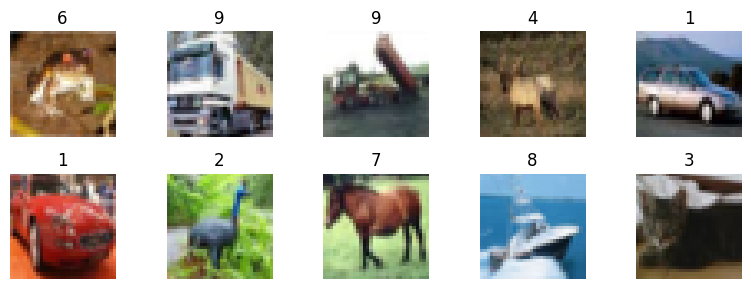

In [20]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])  # no grayscale
    plt.title(int(y_train[i][0]))
    plt.axis("off")
plt.tight_layout()
plt.show()

**Construct a CNN to predict the image labels (cifar 10)**

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,117,546 (4.26 MB)

 Trainable params: 1,117,162 (4.26 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 75ms/step - accuracy: 0.2782 - loss: 1.9969 - val_accuracy: 0.4965 - val_loss: 1.4121
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.4522 - loss: 1.5109 - val_accuracy: 0.5352 - val_loss: 1.2590
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5408 - loss: 1.2829 - val_accuracy: 0.6409 - val_loss: 1.0129
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6089 - loss: 1.1162 - val_accuracy: 0.6839 - val_loss: 0.9075
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6520 - loss: 0.9945 - val_accuracy: 0.6862 - val_loss: 0.8946
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6805 - loss: 0.9174 - val_accuracy: 0.7142 - val_loss: 0.8193
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7044 - loss: 0.8565 - val_accuracy: 0.7291 - val_loss: 0.7910
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 71ms/step - accuracy: 0.7234 - loss: 0.8031 - 

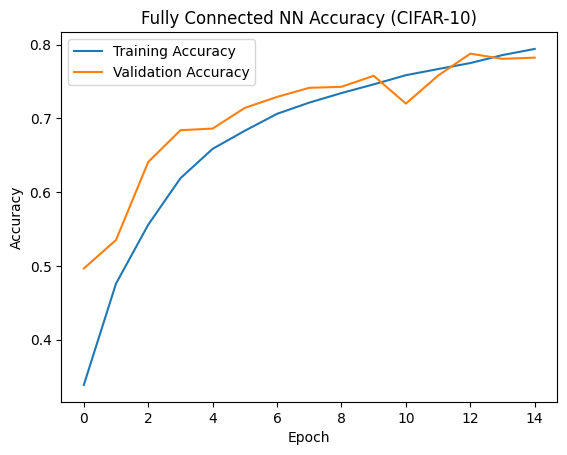

In [21]:
lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=3, verbose=1, min_lr=1e-5
)

early_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=6, restore_best_weights=True
)

data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

convolutional_nn_model = models.Sequential([
    layers.Input(shape=IMG_SIZE + (3,)),
    data_aug,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

convolutional_nn_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

convolutional_nn_model.summary()

convolutional_nn_history = convolutional_nn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[lr_cb, early_cb]
)

plt.plot(convolutional_nn_history.history['accuracy'], label='Training Accuracy')
plt.plot(convolutional_nn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Fully Connected NN Accuracy (CIFAR-10)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Load MNIST and Visualize the sample (cifar 100)**

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


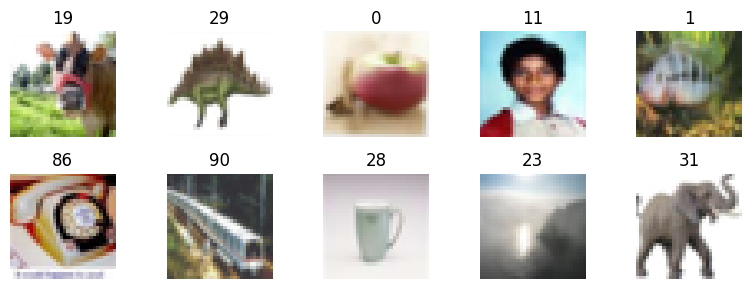

In [22]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

plt.figure(figsize=(8, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])  # no grayscale
    plt.title(int(y_train[i][0]))
    plt.axis("off")
plt.tight_layout()
plt.show()

**Construct a CNN to predict the image labels (cifar 100)**

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


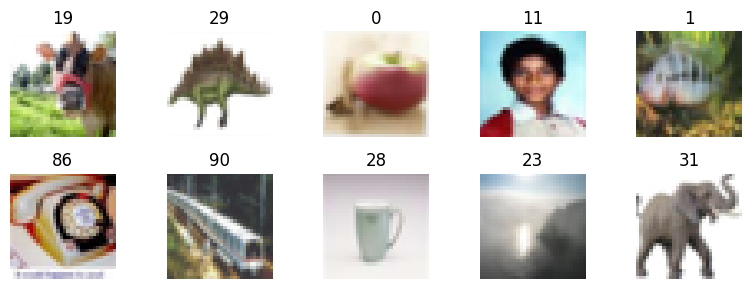

In [22]:
lr_cb = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy", factor=0.5, patience=3, verbose=1, min_lr=1e-5
)

early_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy", patience=6, restore_best_weights=True
)

data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
])

convolutional_nn_model = models.Sequential([
    layers.Input(shape=IMG_SIZE + (3,)),
    data_aug,
    layers.Rescaling(1./255),

    layers.Conv2D(32, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(32, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.Conv2D(64, 3, padding="same", use_bias=False),
    layers.BatchNormalization(),
    layers.Activation("relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.30),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(100, activation="softmax")
])

convolutional_nn_model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9, nesterov=True),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

convolutional_nn_model.summary()

history = convolutional_nn_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=80,
    batch_size=64,
    callbacks=[lr_cb, early_cb],
)

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("CNN Accuracy (CIFAR-100)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()